In [1]:
# enable auto reload of modules
%load_ext autoreload
%autoreload 2

In [2]:
# This part ensures that we can later import loca         return  torch.tensor(0.) l functions 
# from a module in another directory with relative imports

import os
from os import listdir
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader
from src.data.maya_dataset import MayaDataset, MayaTransform, split_data


In [4]:
# Data loaders
dir_img_root = '../data/processed/'
batch_size=8

train_dataset = MayaDataset(dir_img_root, split="train", transform = MayaTransform(use_augmentations=True, use_advanced_augmentations=True))
#NOTE: The val dataset is same as train except it has no augmentations applied!!
val_dataset = MayaDataset(dir_img_root, split="train", transform = MayaTransform(use_augmentations=False))
test_dataset = MayaDataset(dir_img_root, split="test", transform = MayaTransform(use_augmentations=False))

n_train = len(train_dataset)
n_val = len(val_dataset)
n_test = len(test_dataset) 

train_loader, val_loader = split_data(0.8, train_dataset, val_dataset, -1, batch_size, 0)

test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

In [5]:
def channel_statistics(channel, name):
    print(f'\n\nProducing statistics for {name}')
    print(f'Channel shape {channel.shape}')

    print('Stats per color dimension')
    print(f'Min: {channel.min(axis=(0,2,3))}')
    print(f'Max: {channel.max(axis=(0,2,3))}')
    print(f'Mean: {channel.mean(axis=(0,2,3))}')
    print(f'Median: {np.median(channel, axis=(0,2,3))}')

    print(f'0.25 quantile: {np.quantile(channel, 0.25, axis=(0,2,3))}')
    print(f'0.75 quantile: {np.quantile(channel, 0.75, axis=(0,2,3))}')
    print(f'0.90 quantile: {np.quantile(channel, 0.90, axis=(0,2,3))}')

    rows = 1 
    cols = 1 + channel.shape[1]
    fig = plt.figure(figsize=(24, 24 * rows // cols))

    images_so_far = 1
    ax = plt.subplot(rows, cols, images_so_far)
    ax.set_title(f'Histrogram for {name}')
    plt.hist(channel.flatten(), bins=100, range=(0.0, 1.0))

    for c in range(cols-1):
        images_so_far += 1
        ax = plt.subplot(rows, cols, images_so_far)
        ax.set_title(f'Dim {c} of {name}')
        plt.hist(channel[:,[c]].flatten(), bins=100, range=(0.0, 1.0))




Producing statistics for train_lidar
Channel shape (1408, 3, 480, 480)
Stats per color dimension
Min: [0. 0. 0.]
Max: [1.0000006 1.0000001 1.0000006]
Mean: [0.7731985 0.7090894 0.8165623]
Median: [0.85491234 0.78039217 0.90755796]
0.25 quantile: [0.77254903 0.73333335 0.8509804 ]
0.75 quantile: [0.90980393 0.81176472 0.94117647]
0.90 quantile: [0.95294118 0.84313726 0.96470588]


Producing statistics for train_sentinel2
Channel shape (1408, 4, 24, 24)
Stats per color dimension
Min: [0. 0. 0. 0.]
Max: [0.12078185 0.10393997 0.08051628 0.345     ]
Mean: [0.03848704 0.05012547 0.03123818 0.24411583]
Median: [0.04067905 0.0541     0.03341332 0.2666    ]
0.25 quantile: [0.03695997 0.05050562 0.03040081 0.25400001]
0.75 quantile: [0.04449117 0.05736133 0.03626735 0.278     ]
0.90 quantile: [0.04888396 0.06068037 0.03893332 0.28780001]


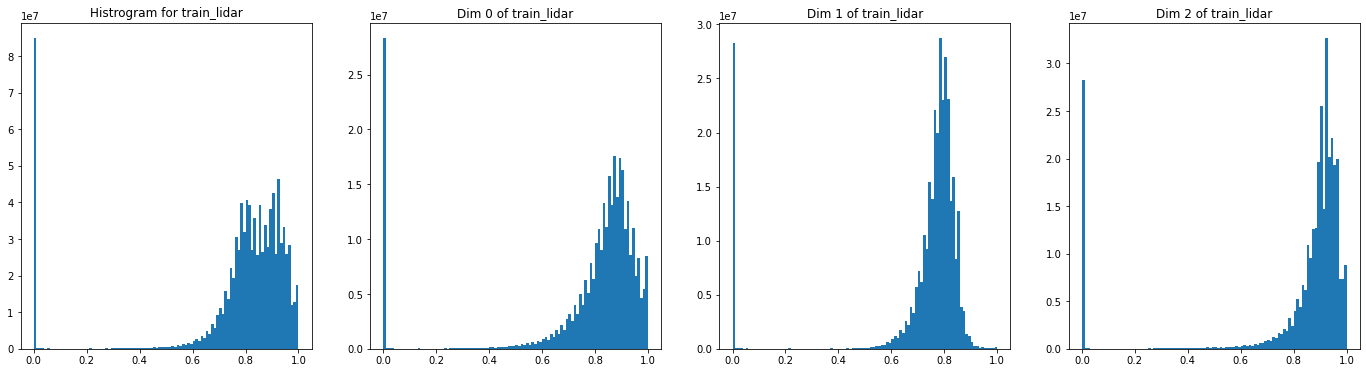

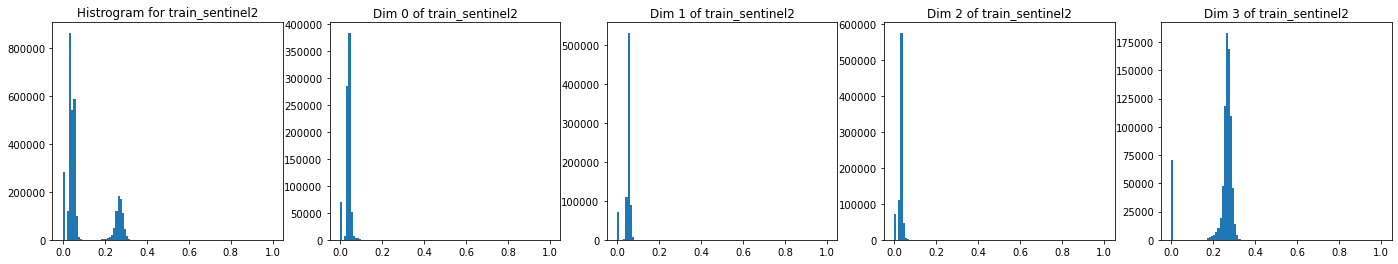

In [6]:
train_lidar = []
train_sentinel2 = []
for s in train_loader:
    train_lidar.append(s['lidar'])
    train_sentinel2.append(s['sentinel2'])

train_lidar = np.concatenate(train_lidar, axis=0)
train_sentinel2 = np.concatenate(train_sentinel2, axis= 0)

channel_statistics(train_lidar, 'train_lidar')
channel_statistics(train_sentinel2, 'train_sentinel2')

> c:\users\stefan\git\maya-challenge\src\data\maya_dataset.py(70)__call__()
     69             import ipdb; ipdb.set_trace()
---> 70             plt.imshow(((sentinel2[6, [3, 2, 1]]-mn)/(mx-mn)).permute(1,2,0).numpy())
     71 

ipdb> c


> c:\users\stefan\git\maya-challenge\src\data\maya_dataset.py(70)__call__()
     69             import ipdb; ipdb.set_trace()
---> 70             plt.imshow(((sentinel2[6, [3, 2, 1]]-mn)/(mx-mn)).permute(1,2,0).numpy())
     71 

ipdb> c




Producing statistics for val_lidar
Channel shape (1412, 3, 480, 480)
Stats per color dimension
Min: [0. 0. 0.]
Max: [1. 1. 1.]
Mean: [0.8487521 0.778058  0.896206 ]
Median: [0.8666667 0.7882353 0.9137255]
0.25 quantile: [0.79607844 0.74509805 0.86666667]
0.75 quantile: [0.92156863 0.81960785 0.95294118]
0.90 quantile: [0.96078432 0.8509804  0.96862745]


Producing statistics for val_sentinel2
Channel shape (1412, 4, 24, 24)
Stats per color dimension
Min: [0.024  0.0312 0.0205 0.1422]
Max: [0.1005 0.0854 0.0679 0.364 ]
Mean: [0.04128198 0.05438119 0.03377216 0.26826817]
Median: [0.0407 0.0542 0.0336 0.2686]
0.25 quantile: [0.038      0.0519     0.0316     0.25799999]
0.75 quantile: [0.0438     0.0567     0.0357     0.27900001]
0.90 quantile: [0.0473     0.0591     0.0378     0.28839999]


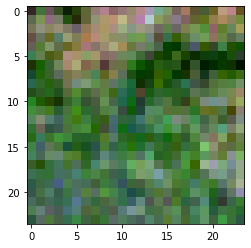

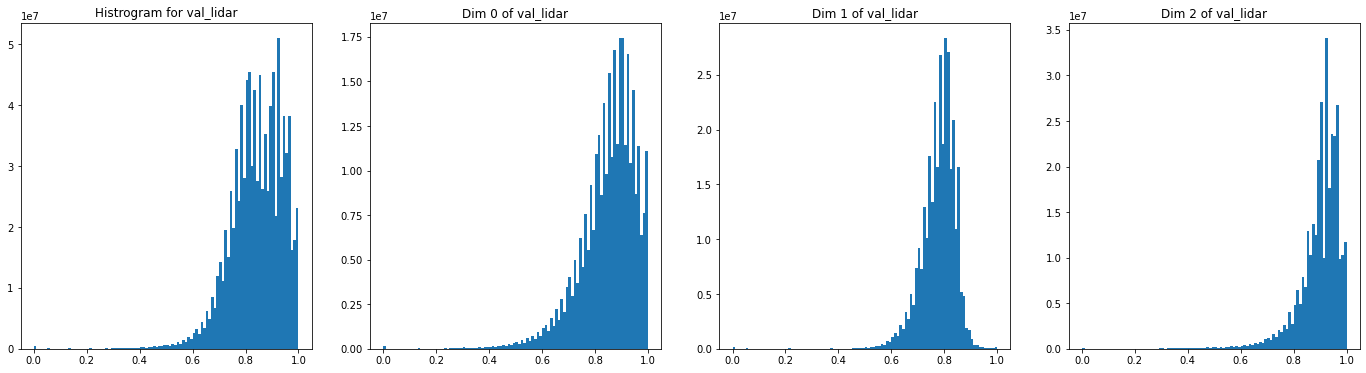

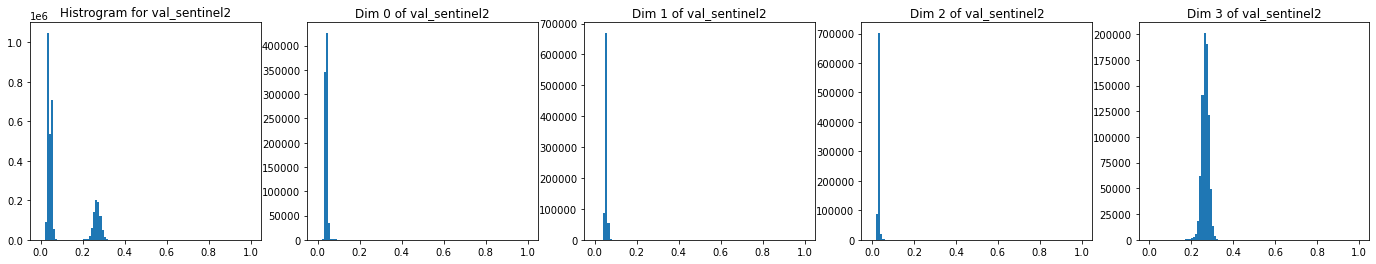

In [7]:
val_lidar = []
val_sentinel2 = []
for s in val_loader:
    val_lidar.append(s['lidar'])
    val_sentinel2.append(s['sentinel2'])

val_lidar = np.concatenate(val_lidar, axis=0)
val_sentinel2 = np.concatenate(val_sentinel2, axis= 0)

channel_statistics(val_lidar, 'val_lidar')
channel_statistics(val_sentinel2, 'val_sentinel2')



Producing statistics for test_lidar
Channel shape (329, 3, 480, 480)
Stats per color dimension
Min: [0. 0. 0.]
Max: [1. 1. 1.]
Mean: [0.8499746 0.7787864 0.8970291]
Median: [0.87058824 0.7882353  0.91764706]
0.25 quantile: [0.80000001 0.74509805 0.86666667]
0.75 quantile: [0.9254902  0.82352942 0.95294118]
0.90 quantile: [0.96470588 0.8509804  0.96862745]


Producing statistics for test_sentinel2
Channel shape (329, 4, 24, 24)
Stats per color dimension
Min: [0.0235 0.0358 0.022  0.1662]
Max: [0.0938 0.0831 0.068  0.3548]
Mean: [0.04116682 0.05445337 0.03374259 0.26976198]
Median: [0.0406 0.0543 0.0336 0.2698]
0.25 quantile: [0.0379     0.052      0.0315     0.25960001]
0.75 quantile: [0.0435     0.0567     0.0357     0.28060001]
0.90 quantile: [0.0471 0.059  0.0378 0.2902]


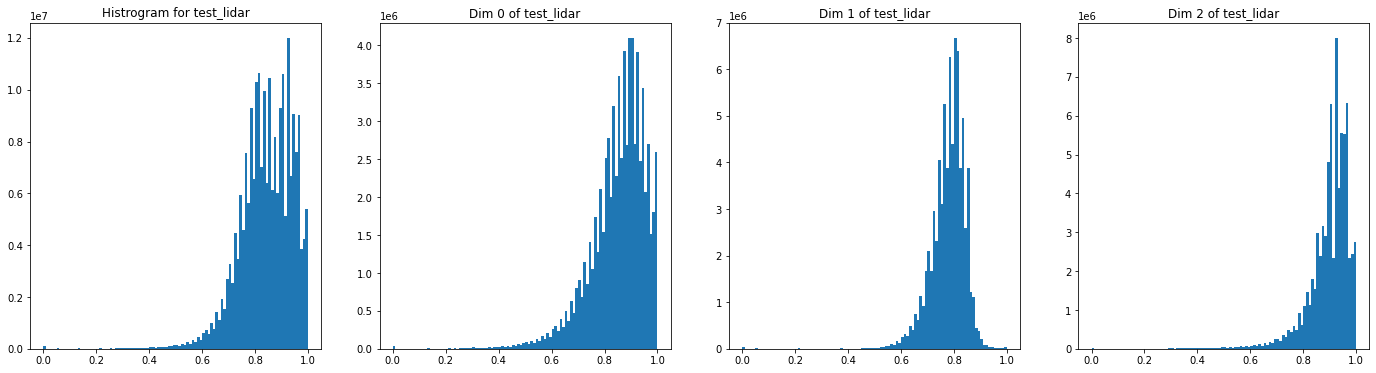

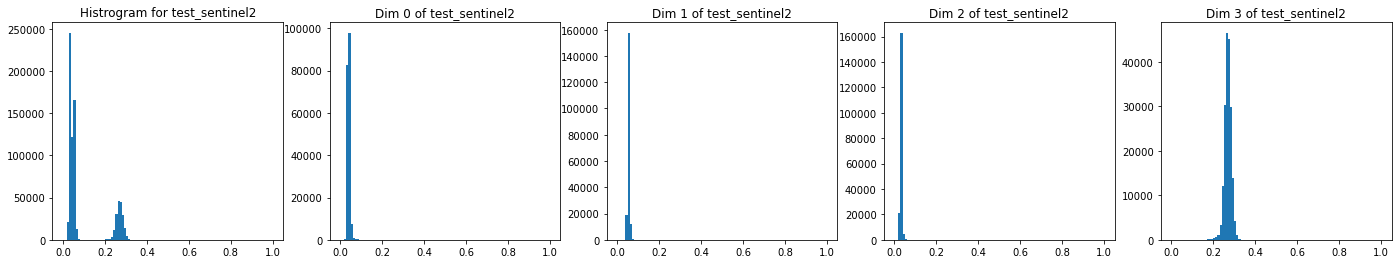

In [8]:
test_lidar = []
test_sentinel2 = []
for s in test_loader:
    test_lidar.append(s['lidar'])
    test_sentinel2.append(s['sentinel2'])

test_lidar = np.concatenate(test_lidar, axis=0)
test_sentinel2 = np.concatenate(test_sentinel2, axis= 0)

channel_statistics(test_lidar, 'test_lidar')
channel_statistics(test_sentinel2, 'test_sentinel2')

In [ ]:
# def visualize_all_sentinel(dataloader, rows = 5, cols = 40 ):
#     images_so_far = 0
#     fig = plt.figure(figsize=(96, 96 * rows // cols))
#     for i_batch, sample_batched in enumerate(dataloader):
#         sample_keys = [k for k in list(sample_batched.keys()) if 'sentinel1' not in k and 'mask' not in k]
#         for j in range(sample_batched[sample_keys[0]].size()[0]):
#             images_so_far += 1
#             ax = plt.subplot(rows, cols, images_so_far)
#             ax.axis('off')
#             dt = sample_batched['ori_lidar']
#             img = dt.cpu().data[j].numpy()[:3]
#             ax.set_title(f'lidar: mean: {img.mean():.2f},\n min: {img.min():.2f}, max: {img.max():.2f}')
#             plt.imshow(img.transpose(1,2,0))

#             for k in range(39):
#                 images_so_far += 1
#                 ax = plt.subplot(rows, cols, images_so_far)
#                 ax.axis('off')
#                 dt = sample_batched['ori_sentinel2']
#                 img = dt.cpu().data[j].numpy()[[k]]
#                 ax.set_title(f'{k}: mean: {img.mean():.2f},\n min: {img.min():.2f}, max: {img.max():.2f}')
#                 plt.imshow(img.transpose(1,2,0))

#             if images_so_far == rows * cols:
#                     return